In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.shape

(891, 15)

## Data Analysis

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alive', ylabel='count'>

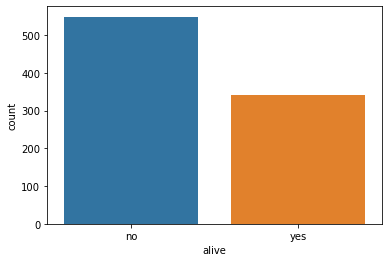

In [5]:
sns.countplot(df['alive'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

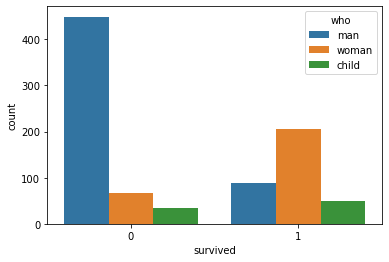

In [6]:
sns.countplot(df['survived'], hue = df['who'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

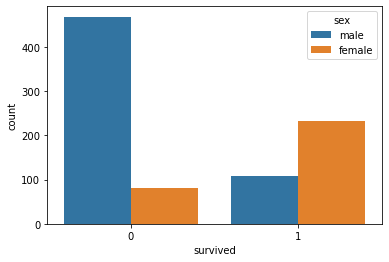

In [7]:
sns.countplot(df['survived'], hue = df['sex'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

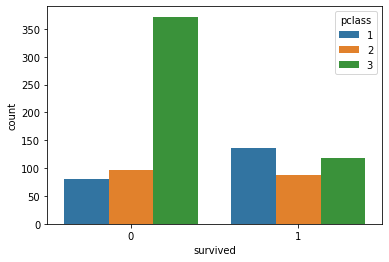

In [8]:
sns.countplot(df['survived'], hue = df['pclass'])

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df['parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

## Data Cleaning

In [11]:
df.drop(columns = ['alive', 'embark_town', 'class', 'alone'], inplace = True)

In [12]:
df.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
who             0
adult_male      0
deck          688
dtype: int64

<AxesSubplot:>

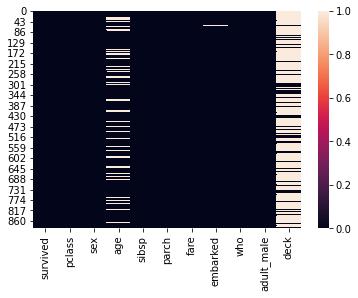

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.isnull().sum()*100/df.shape[0]

survived       0.000000
pclass         0.000000
sex            0.000000
age           19.865320
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
who            0.000000
adult_male     0.000000
deck          77.216611
dtype: float64

In [15]:
df.drop(columns = ['deck'], inplace = True)

In [16]:
df.isnull().sum()*100/df.shape[0]

survived       0.000000
pclass         0.000000
sex            0.000000
age           19.865320
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
who            0.000000
adult_male     0.000000
dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

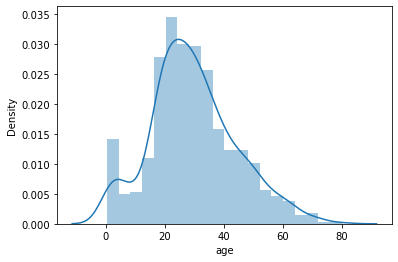

In [17]:
sns.distplot(df['age'])

In [18]:
for var in df['who'].unique():
    df.update(df.loc[df['who'] == var, 'age'].replace(np.nan,df.loc[df['who'] == var, 'age'].median()))

In [19]:
df.isnull().sum()*100/df.shape[0]

survived      0.000000
pclass        0.000000
sex           0.000000
age           0.000000
sibsp         0.000000
parch         0.000000
fare          0.000000
embarked      0.224467
who           0.000000
adult_male    0.000000
dtype: float64

In [20]:
df.dropna(inplace = True)

In [21]:
df.isnull().sum().sum()

0

In [22]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male
0,0,3,male,22.0,1,0,7.2500,S,man,True
1,1,1,female,38.0,1,0,71.2833,C,woman,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False
3,1,1,female,35.0,1,0,53.1000,S,woman,False
4,0,3,male,35.0,0,0,8.0500,S,man,True


In [23]:
df = pd.get_dummies(df, drop_first = True, columns = ['pclass', 'who', 'embarked', 'sex'])

In [24]:
df.head()

,survived,age,sibsp,parch,fare,adult_male,pclass_2,pclass_3,who_man,who_woman,embarked_Q,embarked_S,sex_male
0,0,22.0,1,0,7.2500,True,0,1,1,0,0,1,1
1,1,38.0,1,0,71.2833,False,0,0,0,1,0,0,0
2,1,26.0,0,0,7.9250,False,0,1,0,1,0,1,0
3,1,35.0,1,0,53.1000,False,0,0,0,1,0,1,0
4,0,35.0,0,0,8.0500,True,0,1,1,0,0,1,1


In [25]:
df.drop(columns = ['adult_male'], inplace = True)

In [26]:
df.head()

,survived,age,sibsp,parch,fare,pclass_2,pclass_3,who_man,who_woman,embarked_Q,embarked_S,sex_male
0,0,22.0,1,0,7.2500,0,1,1,0,0,1,1
1,1,38.0,1,0,71.2833,0,0,0,1,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,1,0,1,0
3,1,35.0,1,0,53.1000,0,0,0,1,0,1,0
4,0,35.0,0,0,8.0500,0,1,1,0,0,1,1


## Split and Train Data

In [27]:
X = df.drop(columns = ['survived'])
y = df['survived']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.cluster import KMeans
km = KMeans()
km.fit(X_train, y_train)
y_pred_km = lr.predict(X_test)

In [31]:
from sklearn.svm import SVC

In [32]:
# kernal is used to specify type of algo

svc_r = SVC(kernel='rbf')
svc_r.fit(X_train, y_train)
y_pred_svc_r = svc_r.predict(X_test)

In [33]:
svc_l = SVC(kernel='linear')
svc_l.fit(X_train, y_train)
y_pred_svc_l = svc_l.predict(X_test)

In [34]:
# This can also be used with polynomial.
# kernal is used to specify type of algo

svc_p = SVC(kernel='poly')
svc_p.fit(X_train, y_train)
y_pred_svc_p = svc_p.predict(X_test)

In [35]:
# This can also be used with polynomial.
# kernal is used to specify type of algo
# We can also mention different degrees

svc_p2 = SVC(kernel='poly', degree = 2)
svc_p2.fit(X_train, y_train)
y_pred_svc_p2 = svc_p2.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_svc_r),accuracy_score(y_test, y_pred_svc_l), accuracy_score(y_test, y_pred_svc_p), accuracy_score(y_test, y_pred_svc_p2)

(0.6460674157303371,
 0.8202247191011236,
 0.6179775280898876,
 0.6348314606741573)